<a href="https://colab.research.google.com/github/Tclack88/covid19/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
#Data source: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
import pandas as pd
dat = "https://raw.githubusercontent.com/Tclack88/covid19/master/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(dat)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,5,5
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [193]:
df = df.drop( columns=['Lat','Long','Province/State'])
df = df.rename(columns={'Country/Region':'country'})
df = df.groupby('country').sum().reset_index()
df

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70,77,84,91,107,107,119,119,135,135
176,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113,123,134,141,153,163,174,188,203,212
177,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,16,16,19,26,30,30,31,35,38,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119
178,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3,3,3,12,16,22,28,29,35,35


In [194]:
dates = list(df.columns[1:])
indices = list(range(1,len(dates)+1))
indices
# dates = ['1/28/20'
len(indices)

70

In [0]:
weekly_indices = [i for i in indices if i % 7 == 0 or i == 1]
keep_indices = [0]+weekly_indices

In [196]:
df.iloc[:, weekly_indices]

,1/22/20,1/28/20,2/4/20,2/11/20,2/18/20,2/25/20,3/3/20,3/10/20,3/17/20,3/24/20,3/31/20
0,0,0,0,0,0,1,1,5,22,74,174
1,0,0,0,0,0,0,0,10,55,123,243
2,0,0,0,0,0,1,5,20,60,264,716
3,0,0,0,0,0,0,1,1,39,164,376
4,0,0,0,0,0,0,0,0,0,3,7
...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0,0,0,0,0,0,33,84,135
176,0,2,8,15,16,16,16,31,66,134,212
177,0,0,0,0,0,0,0,26,39,59,119
178,0,0,0,0,0,0,0,0,0,3,35


In [197]:
plot_df = df.iloc[:,keep_indices]
plot_df

,country,1/22/20,1/28/20,2/4/20,2/11/20,2/18/20,2/25/20,3/3/20,3/10/20,3/17/20,3/24/20,3/31/20
0,Afghanistan,0,0,0,0,0,1,1,5,22,74,174
1,Albania,0,0,0,0,0,0,0,10,55,123,243
2,Algeria,0,0,0,0,0,1,5,20,60,264,716
3,Andorra,0,0,0,0,0,0,1,1,39,164,376
4,Angola,0,0,0,0,0,0,0,0,0,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,0,0,0,0,0,0,0,0,33,84,135
176,Vietnam,0,2,8,15,16,16,16,31,66,134,212
177,West Bank and Gaza,0,0,0,0,0,0,0,26,39,59,119
178,Zambia,0,0,0,0,0,0,0,0,0,3,35


In [198]:
diff_df = pd.concat([plot_df.country.to_frame(), plot_df.drop(columns='country').diff(axis=1)],axis=1).fillna(0)
diff_df = diff_df.set_index('country').stack().reset_index()
diff_df.columns = ['country','date','change']
# diff_df.date = pd.to_datetime(diff_df.date)
diff_df

,country,date,change
0,Afghanistan,1/22/20,0.0
1,Afghanistan,1/28/20,0.0
2,Afghanistan,2/4/20,0.0
3,Afghanistan,2/11/20,0.0
4,Afghanistan,2/18/20,0.0
...,...,...,...
1975,Zimbabwe,3/3/20,0.0
1976,Zimbabwe,3/10/20,0.0
1977,Zimbabwe,3/17/20,0.0
1978,Zimbabwe,3/24/20,3.0


In [21]:
# Probably not necessary:::
# cols = plot_df.columns.to_list()
# new_cols = []
# for col in cols:
#   col = '/'.join([c.zfill(2) for c in col.split('/')])
#   new_cols.append(col)
# new_cols

# pd.to_datetime(plot_df.iloc[1:,:], format='%m/%d/%y')y
# plot_df.columns[1:].apply(pd.to_datetime)

['country',
 '01/22/20',
 '01/28/20',
 '02/04/20',
 '02/11/20',
 '02/18/20',
 '02/25/20',
 '03/03/20',
 '03/10/20',
 '03/17/20',
 '03/24/20',
 '03/31/20']

In [0]:
plot_df = plot_df.set_index('country').stack().reset_index()

In [200]:
plot_df

,country,level_1,0
0,Afghanistan,1/22/20,0
1,Afghanistan,1/28/20,0
2,Afghanistan,2/4/20,0
3,Afghanistan,2/11/20,0
4,Afghanistan,2/18/20,0
...,...,...,...
1975,Zimbabwe,3/3/20,0
1976,Zimbabwe,3/10/20,0
1977,Zimbabwe,3/17/20,0
1978,Zimbabwe,3/24/20,3


In [0]:
plot_df.columns=['country','date','count']

In [202]:
plot_df

,country,date,count
0,Afghanistan,1/22/20,0
1,Afghanistan,1/28/20,0
2,Afghanistan,2/4/20,0
3,Afghanistan,2/11/20,0
4,Afghanistan,2/18/20,0
...,...,...,...
1975,Zimbabwe,3/3/20,0
1976,Zimbabwe,3/10/20,0
1977,Zimbabwe,3/17/20,0
1978,Zimbabwe,3/24/20,3


In [203]:
diff_df

,country,date,change
0,Afghanistan,1/22/20,0.0
1,Afghanistan,1/28/20,0.0
2,Afghanistan,2/4/20,0.0
3,Afghanistan,2/11/20,0.0
4,Afghanistan,2/18/20,0.0
...,...,...,...
1975,Zimbabwe,3/3/20,0.0
1976,Zimbabwe,3/10/20,0.0
1977,Zimbabwe,3/17/20,0.0
1978,Zimbabwe,3/24/20,3.0


In [0]:
plot_df = plot_df.merge(diff_df)

In [205]:
# plot_df.date = plot_df.date.apply(pd.to_datetime)
plot_df

,country,date,count,change
0,Afghanistan,1/22/20,0,0.0
1,Afghanistan,1/28/20,0,0.0
2,Afghanistan,2/4/20,0,0.0
3,Afghanistan,2/11/20,0,0.0
4,Afghanistan,2/18/20,0,0.0
...,...,...,...,...
1975,Zimbabwe,3/3/20,0,0.0
1976,Zimbabwe,3/10/20,0,0.0
1977,Zimbabwe,3/17/20,0,0.0
1978,Zimbabwe,3/24/20,3,3.0


In [224]:
country_region_df = pd.read_html("https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification")[0]
CR_map = dict(zip(country_region_df['Country'], country_region_df['Region']))
CR_map

{'Afghanistan': 'Asia & Pacific',
 'Aland Islands': 'Europe',
 'Albania': 'Europe',
 'Algeria': 'Arab States',
 'American Samoa': 'Asia & Pacific',
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Anguilla': 'South/Latin America',
 'Anonymous Proxy': 'Unknown',
 'Antarctica': 'Asia & Pacific',
 'Antigua and Barbuda': 'South/Latin America',
 'Argentina': 'South/Latin America',
 'Armenia': 'Europe',
 'Aruba': 'South/Latin America',
 'Asia/Pacific Region': 'Asia & Pacific',
 'Australia': 'Asia & Pacific',
 'Austria': 'Europe',
 'Azerbaijan': 'Asia & Pacific',
 'Bahamas': 'South/Latin America',
 'Bahrain': 'Arab States',
 'Bangladesh': 'Asia & Pacific',
 'Barbados': 'South/Latin America',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'South/Latin America',
 'Benin': 'Africa',
 'Bermuda': 'North America',
 'Bhutan': 'Asia & Pacific',
 'Bolivia': 'South/Latin America',
 'Bonaire, Saint Eustatius and Saba': 'Unknown',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Bouvet I

In [228]:
new_plot_df = plot_df.copy()
new_plot_df['region'] = new_plot_df.country.map(CR_map)
new_plot_df

,country,date,count,change,region
0,Afghanistan,1/22/20,0,0.0,Asia & Pacific
1,Afghanistan,1/28/20,0,0.0,Asia & Pacific
2,Afghanistan,2/4/20,0,0.0,Asia & Pacific
3,Afghanistan,2/11/20,0,0.0,Asia & Pacific
4,Afghanistan,2/18/20,0,0.0,Asia & Pacific
...,...,...,...,...,...
1975,Zimbabwe,3/3/20,0,0.0,Africa
1976,Zimbabwe,3/10/20,0,0.0,Africa
1977,Zimbabwe,3/17/20,0,0.0,Africa
1978,Zimbabwe,3/24/20,3,3.0,Africa


In [0]:
new_plot_df.region = new_plot_df.region.fillna('OTHER')

In [0]:
new_plo

In [246]:
import plotly.express as px
px.scatter(new_plot_df, x="count", y="change", animation_frame="date", animation_group="country",
           hover_name="country", width=1600, height=800, color='region',
           log_x=True, log_y=True, size_max=500, range_x=[100,300000], range_y=[25,150000])

In [0]:
# from numpy import log10

In [0]:
plot_data = plot_df[['country','3/31/20']]
plot_data['change'] = plot_df['3/31/20'] - plot_df['3/24/20']
plot_data.columns = ['country','last','change']
# plot_data[['last','change']] = plot_data[['last','change']].apply(log10)
plot_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,last,change
0,Afghanistan,174,100
1,Albania,243,120
2,Algeria,716,452
3,Andorra,376,212
4,Angola,7,4
...,...,...,...
175,Venezuela,135,51
176,Vietnam,212,78
177,West Bank and Gaza,119,60
178,Zambia,35,32


In [0]:
plot_data['last']

0      174
1      243
2      716
3      376
4        7
      ... 
175    135
176    212
177    119
178     35
179      8
Name: last, Length: 180, dtype: int64

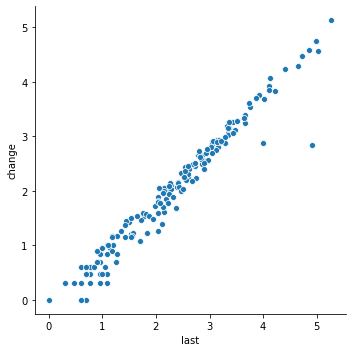

In [0]:
# X log of total confirmed cases,  Y: new confirmed places (last week or so)
import seaborn as sb
sb.relplot(data=plot_data, x='last', y='change');

In [0]:
# i=0
# for c in country_list:
#   c = c.iloc[90:,:] # get relevant data from 1890 on
#   c = c[feature_list]
#   sb.relplot(data=c,x='income',y='lifespan',size='population',sizes=(30,400),color='C'+str(i))
#   plt.xlim((150,150000))
#   plt.ylim((0,90))
#   plt.xscale('log')
#   i +=1

In [0]:
import plotly.express as px

In [0]:
fig = px.scatter(plot_data, x= 'last', y='change', hover_name='country',
                  width=800, height=800,
             title = 'China and South Korea have escaped the exponential growth')
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()

In [0]:
px.data.gapminder()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
